### Suppose there is an investment fund planning to invest in properties at hundreds of locations. 🏠 Based on the previous millions of property sales over the past few years, the fund house wants to identify the property which can result in a higher gain on investment. 💰 They can not go by analyzing all the properties one by one. 🤔 So they want the segmentation of properties so that they can look into their target segments. 🎯 So this challenge is going to help them by easily identifying their target properties using advanced AI and Analytics. 🔍

### In the first week, you will receive a dataset of real estate properties with locality, estimated price, and selling price for the last 23 years. 📊 The task is to identify the input features in the dataset and use them to predict the sale price of a property. 🔮 After this modelling of input and output features, predict the sale price of all the properties in the test dataset. 💵 Once the sale prices for the test data are predicted, put these properties into 4 segments. 🔢 These segments can be formed according to the gain. 💹 The gain is calculated based on the estimated price and predicted sale price (Gain = (Sale price - Estimated price)/100).


## Input features



Year: The year in which the property was sold or valued.

Date: The date on which the property was sold or valued.

Locality: The name of the town where the property is located.

Address: The complete address of the property.

Estimated Value: The estimated market value of the property, which is based on factors such as its location, size, and condition.

Property: A categorical feature indicating the type of property. There are six different categories.
Condo
Single-Family
Three Family
Two Family
Four Family
Residential

Residential: A categorical feature which further explains the category in which a certain property falls. There are five different types of categories.
Condominium
Detached House
Triplex
Duplex
Fourplex

num_rooms: A numerical feature which defines the number of rooms (e.g. bedrooms, living rooms, etc.) in the property.

carpet_area: The carpet area of the property, refers to the area of the floor that could be used for the flooring.

property_tax_rate: The rate at which property taxes are assessed on the property, which may vary based on its location and year.

Sale Price: The actual price at which the property was sold, which may be higher or lower than the estimated value.

Target

Segment: It is a categorical feature which is encoded based on the forecast. There are four segments.

Segment 0 (Premium Properties): The segment likely includes high-gain 

Segment 1 (Valuable Properties): The segment likely includes apartments that are more affordable for people on a budget.

Segment 2 (Standard Properties): The segment likely includes smaller homes that are affordable for first-time homebuyers with negligible gain 

Segment 3 (Budget Properties): The segment likely includes properties that are not great investment

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.tree import DecisionTreeRegressor

In [2]:
import warnings 
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv(r"C:\Users\shaik\Downloads\Participants_Data_TGREDC\train.csv")


In [4]:
data.head()

,Year,Date,Locality,Address,Estimated Value,Sale Price,Property,Residential,num_rooms,carpet_area,property_tax_rate
0,2009,2009-01-02,Greenwich,40 ETTL LN UT 24,711270.0,975000.0,Condo,Condominium,2,760,1.025953
1,2009,2009-01-02,East Hampton,18 BAUER RD,119970.0,189900.0,Single Family,Detached House,3,921,1.025953
2,2009,2009-01-02,Ridgefield,48 HIGH VALLEY RD.,494530.0,825000.0,Single Family,Detached House,3,982,1.025953
3,2009,2009-01-02,Old Lyme,56 MERIDEN RD,197600.0,450000.0,Single Family,Detached House,3,976,1.025953
4,2009,2009-01-02,Naugatuck,13 CELENTANO DR,105440.0,200000.0,Single Family,Detached House,3,947,1.025953


In [5]:
import dtale.global_state as global_state

global_state.set_chart_settings({'scatter_points': 1500000, '3d_points': 40000})

In [67]:
import dtale
dtale.show(data)


2023-07-06 11:11:31,657 - ERROR    - Exception occurred while processing request: Could not convert value of 'y' into a numeric type.
Traceback (most recent call last):
  File "C:\Users\shaik\anaconda3\lib\site-packages\plotly\express\_core.py", line 343, in make_trace_kwargs
    y = y.astype(np.float64)
ValueError: could not convert string to float: 'Condo'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\shaik\anaconda3\lib\site-packages\dtale\views.py", line 112, in _handle_exceptions
    return func(*args, **kwargs)
  File "C:\Users\shaik\anaconda3\lib\site-packages\dtale\views.py", line 2811, in get_column_analysis
    return jsonify(**analysis.build())
  File "C:\Users\shaik\anaconda3\lib\site-packages\dtale\column_analysis.py", line 139, in build
    return_data, code = self.analysis.build(self)
  File "C:\Users\shaik\anaconda3\lib\site-packages\dtale\column_analysis.py", line 619, in build
    trend_line =

In [7]:
from ydata_profiling import ProfileReport
profile=ProfileReport(data,explorative=True)
profile.to_file('output.html')

2023-07-05 02:26:27,493 - INFO     - Pandas backend loaded 1.5.3
2023-07-05 02:26:27,508 - INFO     - Numpy backend loaded 1.23.5
2023-07-05 02:26:27,531 - INFO     - Pyspark backend loaded 3.4.1
2023-07-05 02:26:27,532 - INFO     - Python backend loaded


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
data.shape

(553952, 11)

## EDA

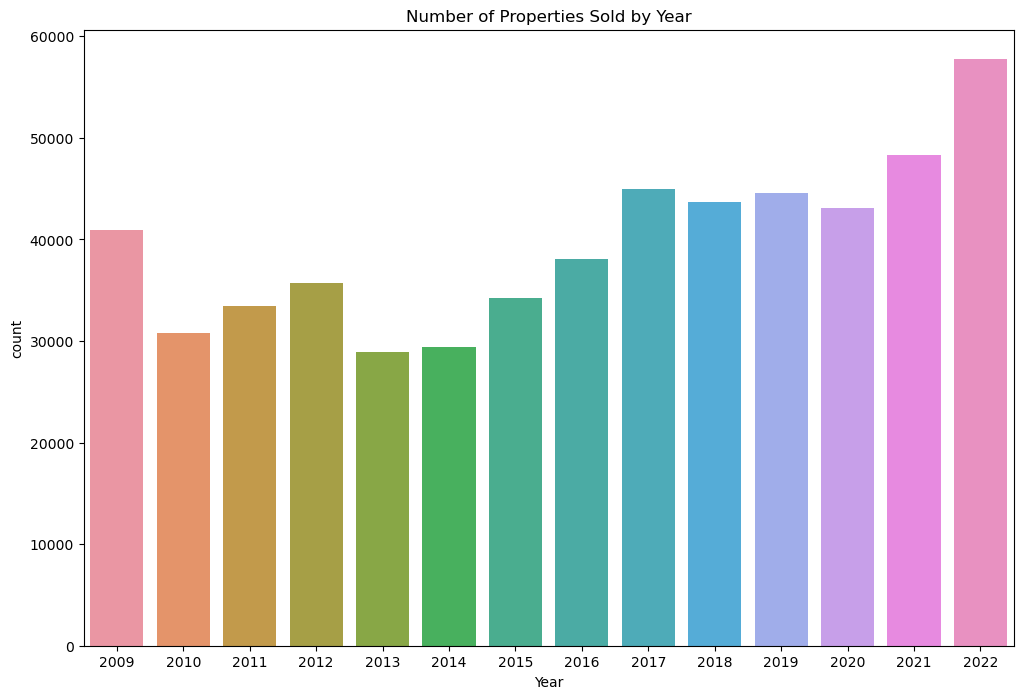

In [6]:
plt.figure(figsize=(12,8))
sns.countplot(x='Year',data=data)
plt.title('Number of Properties Sold by Year')
plt.show()

### As we can clearly see that data is pretty much well spreaded over Year

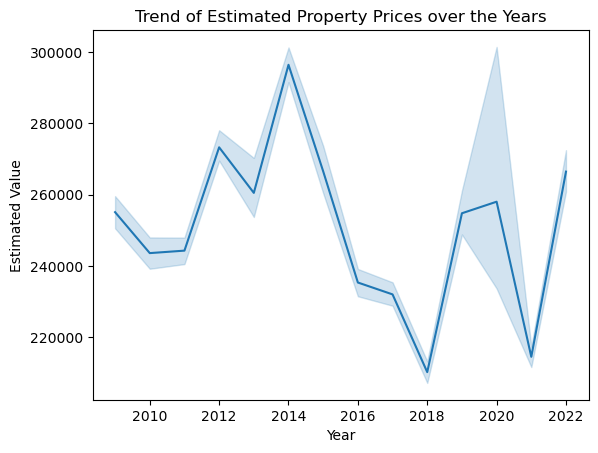

In [36]:
sns.lineplot(x='Year', y='Estimated Value',data=data,ci=95)
plt.title('Trend of Estimated Property Prices over the Years')
plt.show()


## The Mean Estimated Value for every year is not following any trend but we can see that the Estimated Value hits it least ground value in 2018

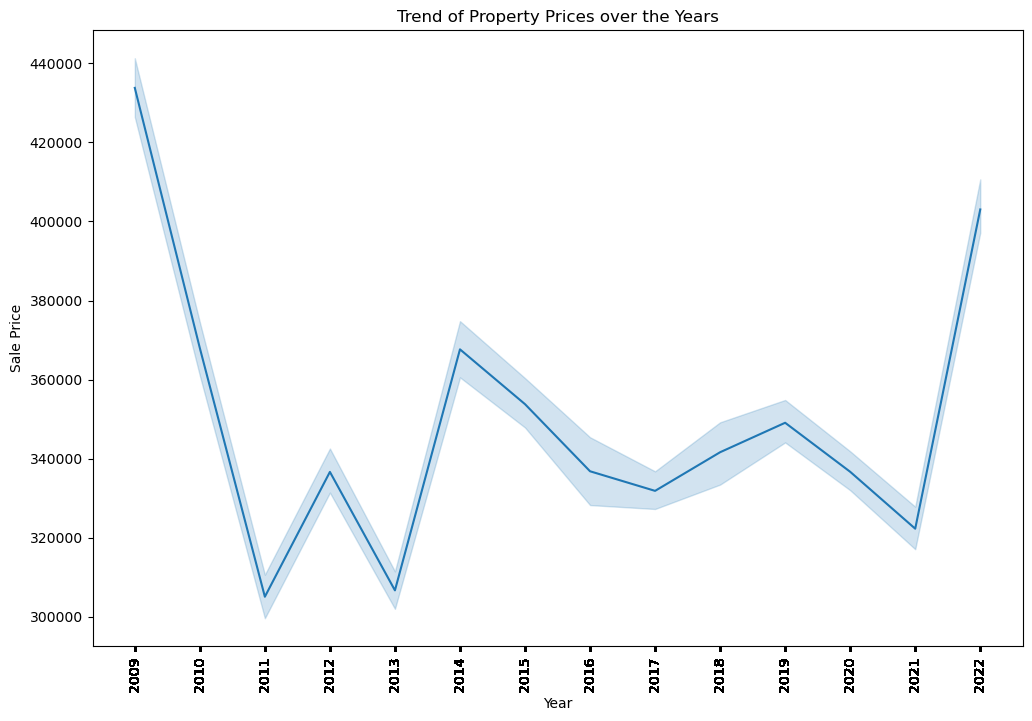

In [8]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Year', y='Sale Price', data=data, ci=95)
plt.title('Trend of Property Prices over the Years')
plt.xticks(data['Year'], rotation=90)  # Set x-axis ticks to every year and rotate them vertically
plt.xlabel('Year')
plt.ylabel('Sale Price')
plt.show()

# But the Mean Sale Price is the least for year 2011 and 2013 and the highest is for 2009

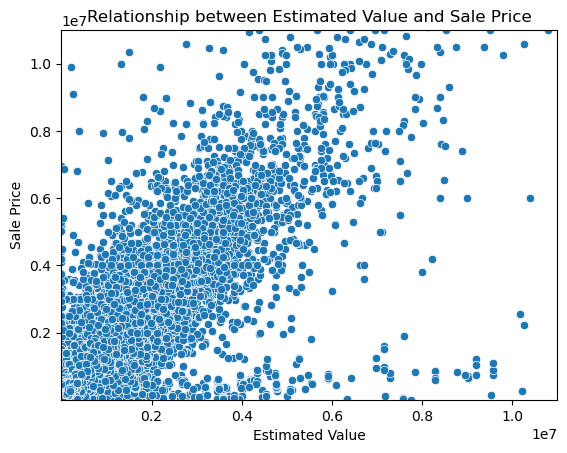

In [9]:
plt.xlim(1000,11000000)
plt.ylim(100,11000000)
sns.scatterplot(x='Estimated Value', y='Sale Price', data=data)
plt.title('Relationship between Estimated Value and Sale Price')
plt.show()


## There is a somewhat linear relationship between Estimated Value and Sale Price  but some values  do not follow the relationship between them


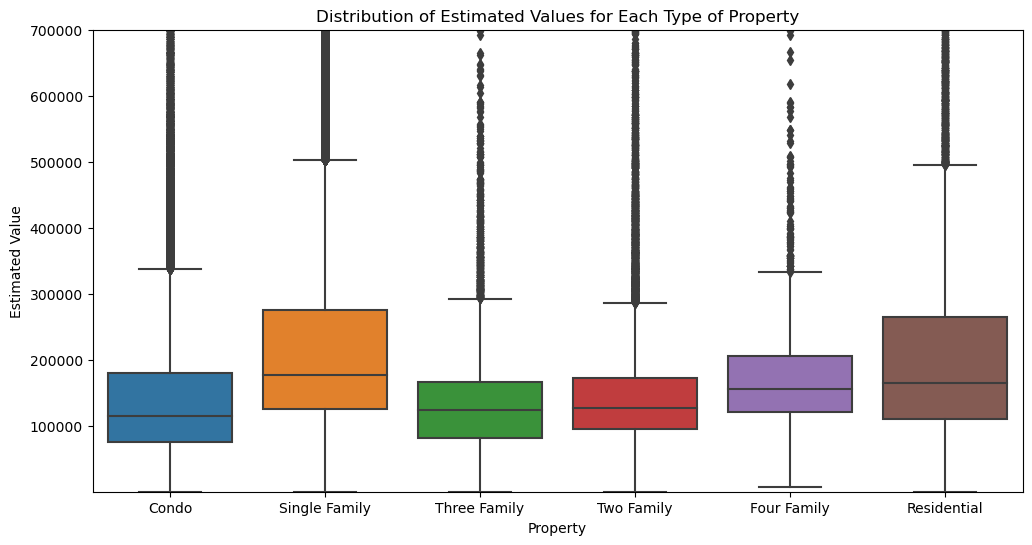

In [10]:
plt.figure(figsize=(12,6))
plt.ylim(100,700000)
sns.boxplot(x='Property', y='Estimated Value', data=data)
plt.title('Distribution of Estimated Values for Each Type of Property')
plt.show()


## As we can clearly see that the Estimated Value for every property type has mostly outliers and very less amount of data and the same with Sale Price


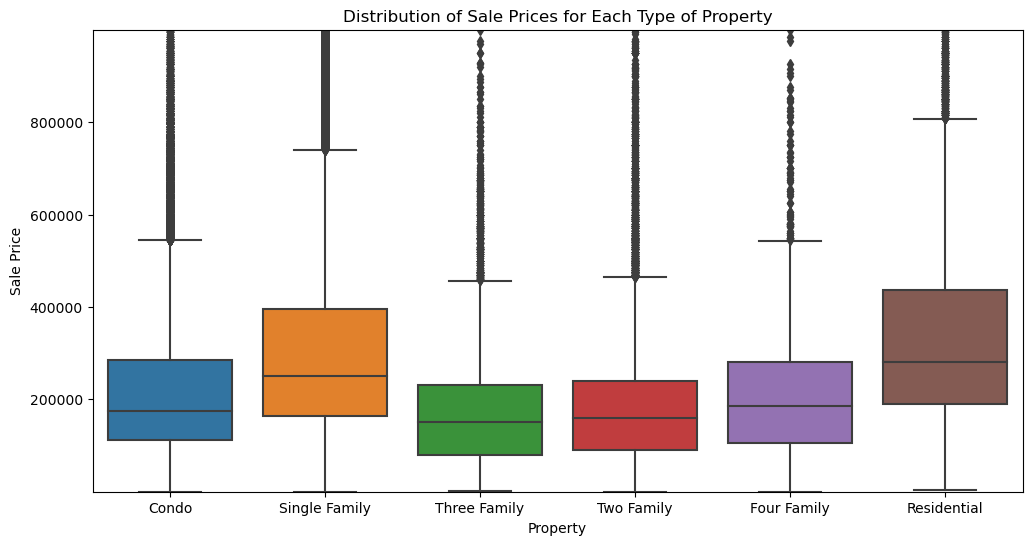

In [11]:
plt.figure(figsize=(12,6))
plt.ylim(100,999999)
sns.boxplot(x='Property', y='Sale Price', data=data)
plt.title('Distribution of Sale Prices for Each Type of Property')
plt.show()


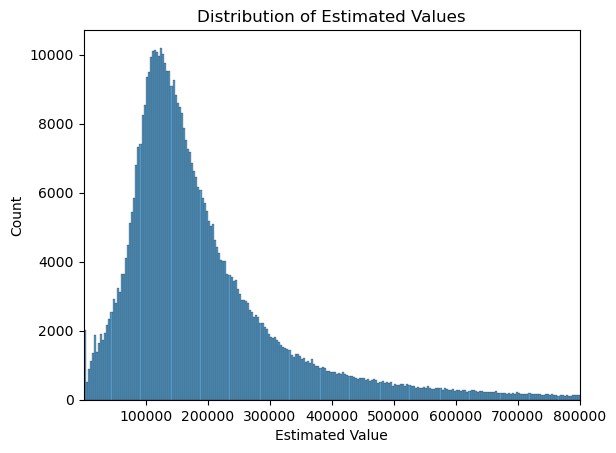

In [12]:
plt.xlim(100,800000)
sns.histplot(x='Estimated Value', data=data)
plt.title('Distribution of Estimated Values')
plt.show()

## The right-skewed Estimated Value graph suggests that most properties have lower values, while a few properties have significantly higher values, indicating a disparity in property values. Potential investment opportunities may lie in lower-valued properties, while a subset of premium properties commands higher values.`

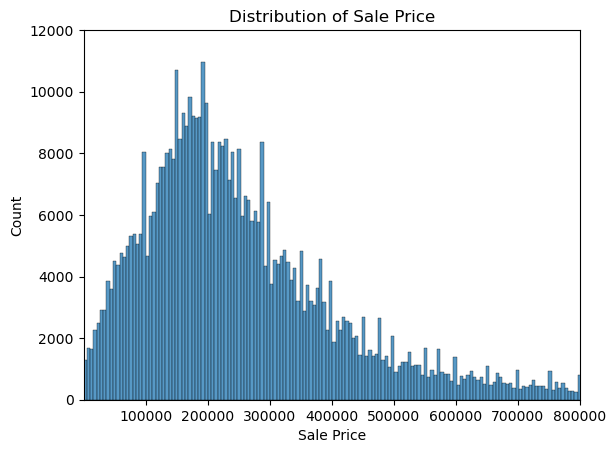

In [13]:
plt.xlim(100,800000)
plt.ylim(0,12000)
sns.histplot(x='Sale Price', data=data)
plt.title('Distribution of Sale Price')
plt.show()

In [14]:
locality_counts = data['Locality'].value_counts()

# Selecting top 10 localities by counts
top_10_localities = locality_counts.head(10)

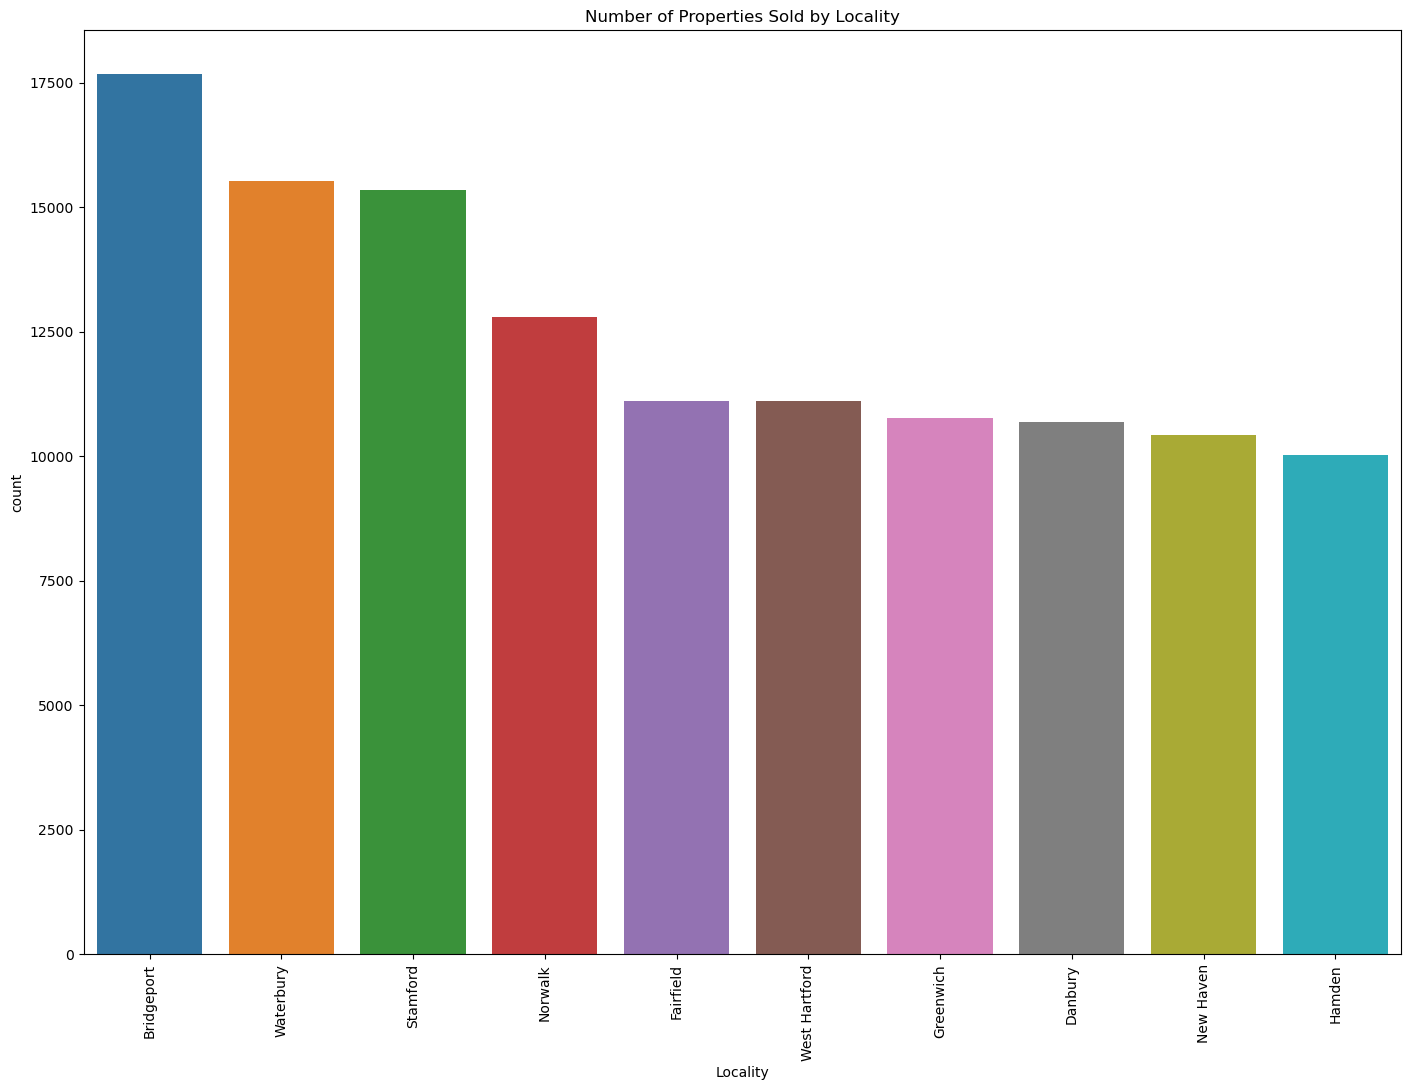

In [15]:
plt.figure(figsize=(17,12))
sns.countplot(x='Locality', data=data,order=top_10_localities.index)
plt.title('Number of Properties Sold by Locality')
plt.xticks(rotation=90)
plt.show()


In [16]:
print(data["Sale Price"].min(),data["Sale Price"].max())

0.0 157000000.0


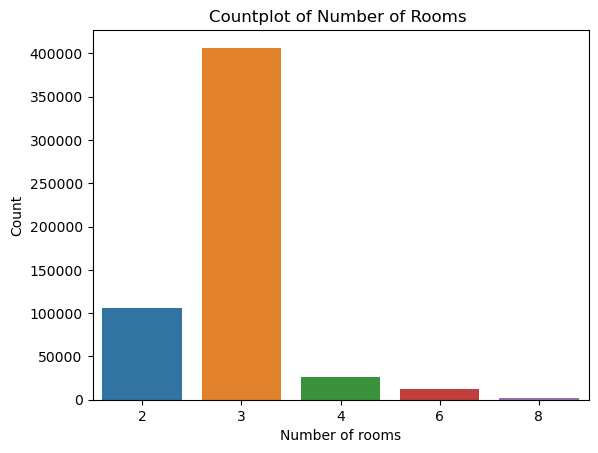

In [64]:

sns.countplot(x='num_rooms', data=data)

# Adding labels and title
plt.xlabel('Number of rooms')
plt.ylabel('Count')
plt.title('Countplot of Number of Rooms ')

# Displaying the plot
plt.show()


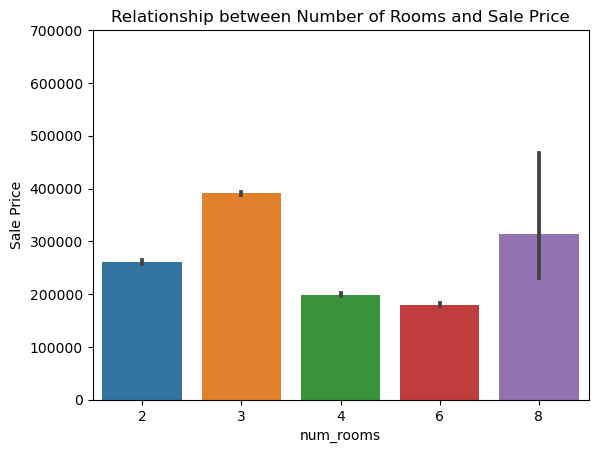

In [65]:
plt.ylim(0,700000)
sns.barplot(x='num_rooms', y='Sale Price', data=data)
plt.title('Relationship between Number of Rooms and Sale Price')
plt.show()


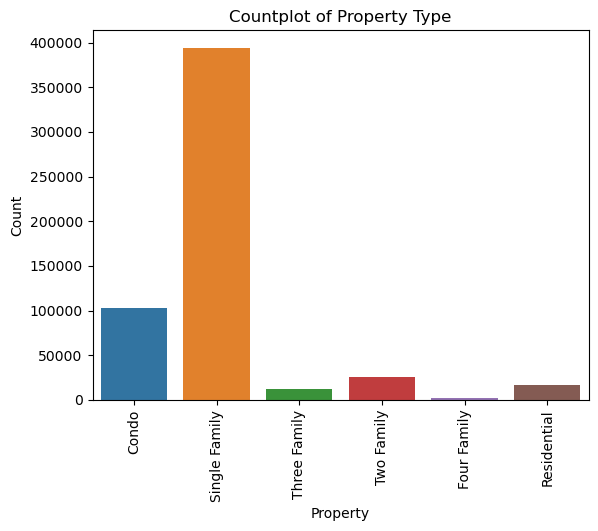

In [66]:

sns.countplot(x='Property', data=data)

# Adding labels and title
plt.xlabel('Property')
plt.ylabel('Count')
plt.title('Countplot of Property Type')
plt.xticks(rotation=90)
# Displaying the plot
plt.show()


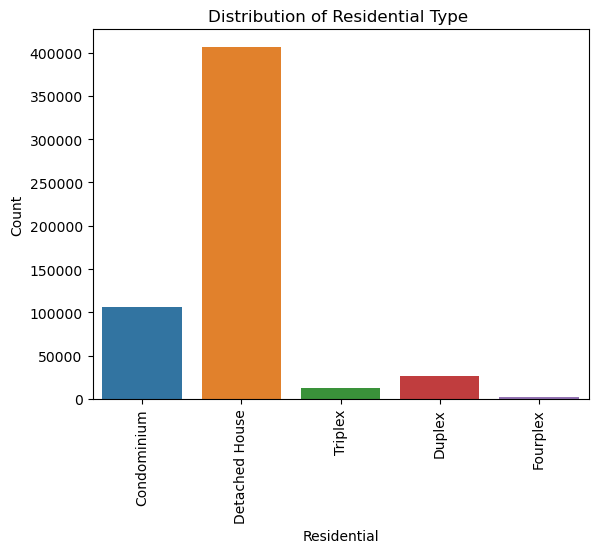

In [61]:

sns.countplot(x='Residential', data=data)

# Adding labels and title
plt.xlabel('Residential')
plt.ylabel('Count')
plt.title('Distribution of Residential Type ')
plt.xticks(rotation=90)

# Displaying the plot
plt.show()


In [18]:
data.head()

,Year,Date,Locality,Address,Estimated Value,Sale Price,Property,Residential,num_rooms,carpet_area,property_tax_rate
0,2009,2009-01-02,Greenwich,40 ETTL LN UT 24,711270.0,975000.0,Condo,Condominium,2,760,1.025953
1,2009,2009-01-02,East Hampton,18 BAUER RD,119970.0,189900.0,Single Family,Detached House,3,921,1.025953
2,2009,2009-01-02,Ridgefield,48 HIGH VALLEY RD.,494530.0,825000.0,Single Family,Detached House,3,982,1.025953
3,2009,2009-01-02,Old Lyme,56 MERIDEN RD,197600.0,450000.0,Single Family,Detached House,3,976,1.025953
4,2009,2009-01-02,Naugatuck,13 CELENTANO DR,105440.0,200000.0,Single Family,Detached House,3,947,1.025953


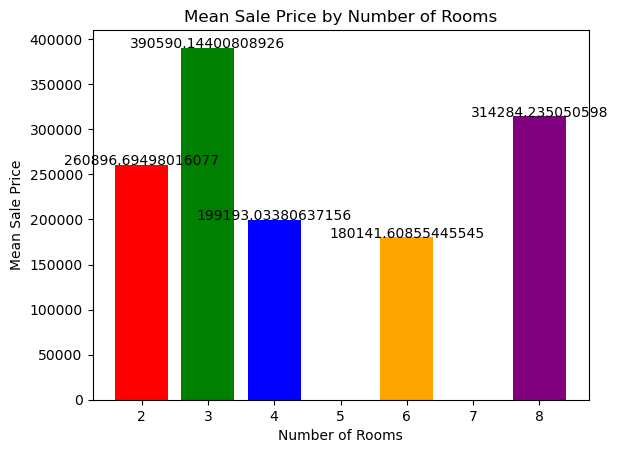

In [19]:
# Grouping the data by 'Num of rooms' and calculating the sum of 'Sale Price'
grouped_df = data.groupby('num_rooms')['Sale Price'].mean().reset_index()

# Plotting the data
plt.bar(grouped_df['num_rooms'], grouped_df['Sale Price'], color=['red', 'green', 'blue', 'orange', 'purple'])
plt.xlabel('Number of Rooms')
plt.ylabel('Mean Sale Price')
plt.title('Mean Sale Price by Number of Rooms')

# Adding labels to the bars
for i, value in enumerate(grouped_df['Sale Price']):
    plt.text(grouped_df['num_rooms'].iloc[i], value, str(value), ha='center')

plt.show()


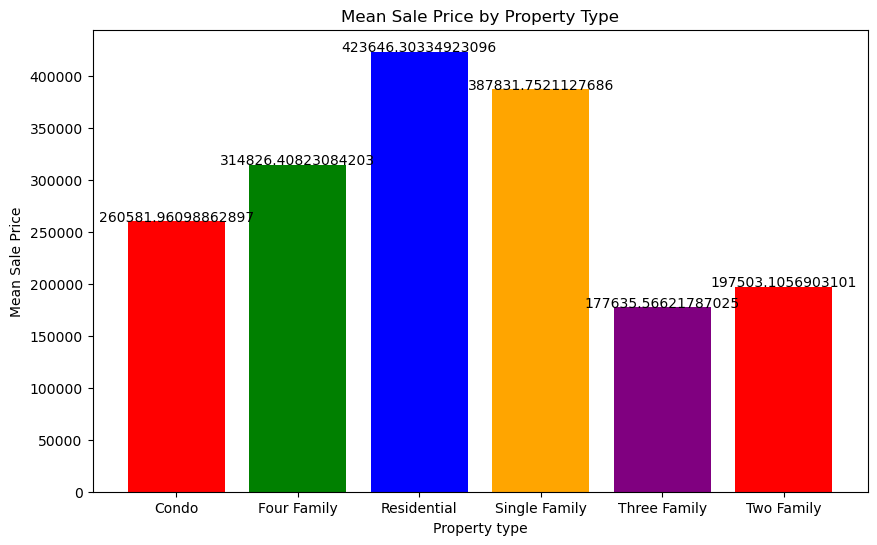

In [20]:
plt.figure(figsize=(10,6))
# Grouping the data by 'Num of rooms' and calculating the sum of 'Sale Price'
grouped_df_prop= data.groupby('Property')['Sale Price'].mean().reset_index()

# Plotting the data
plt.bar(grouped_df_prop['Property'], grouped_df_prop['Sale Price'], color=['red', 'green', 'blue', 'orange', 'purple'])
plt.xlabel('Property type')
plt.ylabel('Mean Sale Price')
plt.title('Mean Sale Price by Property Type')

# Adding labels to the bars
for i, value in enumerate(grouped_df_prop['Sale Price']):
    plt.text(grouped_df_prop['Property'].iloc[i], value, str(value), ha='center')

plt.show()


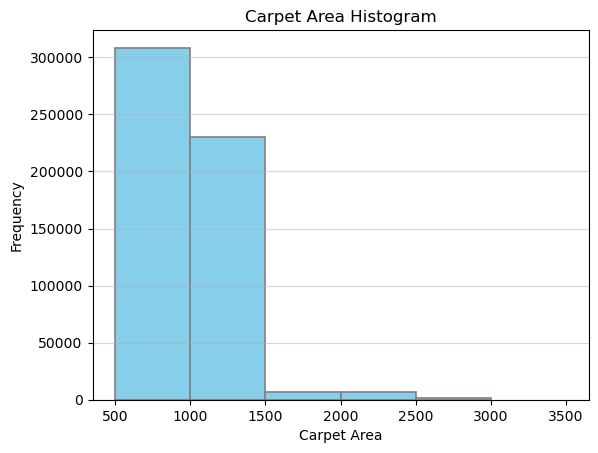

In [21]:



# Create histogram with bins of 500
plt.hist(data["carpet_area"], bins=range(500, 3500, 500),color='skyblue', edgecolor='gray', linewidth=1.2)

# Set x-axis and y-axis labels
plt.xlabel('Carpet Area')
plt.ylabel('Frequency')

# Set plot title
plt.title('Carpet Area Histogram')

# Add grid lines
plt.grid(axis='y', alpha=0.5)

# Adjust bar width
plt.bar(data["carpet_area"], [1] * len(data["carpet_area"]), width=500, align='edge', alpha=0.7, color='lightblue', edgecolor='gray', linewidth=0.5)
# Display the plot
plt.show()


In [ ]:
# The Carpet Area of properties are mostly in the range of 500 to 1500 

<AxesSubplot:xlabel='Sale Price'>

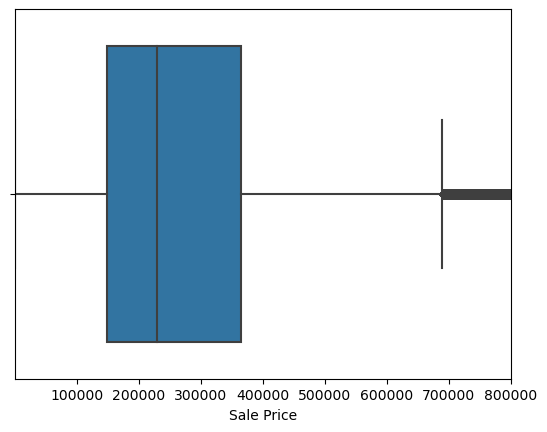

In [22]:
plt.xlim(100,800000)
plt.ylim(0,12000)
sns.boxplot(data["Sale Price"])

In [23]:
import pandas as pd


# Set the random seed for reproducibility
random_seed = 42

# Number of samples you want to select
num_samples = 2000

# Sampling based on the 'num_rooms' column
sampled_data = data.sample(n=num_samples, random_state=random_seed)

# Create a new dataframe with the sampled data
sampled_df = pd.DataFrame(sampled_data)




In [24]:
data.head()

,Year,Date,Locality,Address,Estimated Value,Sale Price,Property,Residential,num_rooms,carpet_area,property_tax_rate
0,2009,2009-01-02,Greenwich,40 ETTL LN UT 24,711270.0,975000.0,Condo,Condominium,2,760,1.025953
1,2009,2009-01-02,East Hampton,18 BAUER RD,119970.0,189900.0,Single Family,Detached House,3,921,1.025953
2,2009,2009-01-02,Ridgefield,48 HIGH VALLEY RD.,494530.0,825000.0,Single Family,Detached House,3,982,1.025953
3,2009,2009-01-02,Old Lyme,56 MERIDEN RD,197600.0,450000.0,Single Family,Detached House,3,976,1.025953
4,2009,2009-01-02,Naugatuck,13 CELENTANO DR,105440.0,200000.0,Single Family,Detached House,3,947,1.025953


In [25]:
from geopy.geocoders import Nominatim

# Create a geocoder instance
geolocator = Nominatim(user_agent="my_app")

latitudes = []
longitudes = []

for address in sampled_df["Locality"]:
    location = geolocator.geocode(address)
    if location is not None:
        latitude = location.latitude
        longitude = location.longitude
        latitudes.append(latitude)
        longitudes.append(longitude)




In [26]:
import folium

# 'latitudes' and 'longitudes' are lists/arrays of latitude and longitude coordinates

# Create a map centered around the average coordinates
latitude_center = sum(latitudes) / len(latitudes)
longitude_center = sum(longitudes) / len(longitudes)
map = folium.Map(location=[latitude_center, longitude_center], zoom_start=10)

# Add markers for each property with popup information
for lat, lon, price,room in zip(latitudes, longitudes, sampled_df["Sale Price"],sampled_df["num_rooms"]):
    folium.Marker([lat, lon], popup=f"Sale Price: {price} , Number of rooms : {room}").add_to(map)

map


In [34]:
#for value in colname:
q1 = data['Sale Price'].quantile(0.25) #first quartile value
q3 = data['Sale Price'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range


In [35]:
iqr,low,high

(216700.0, -177050.0, 689750.0)

In [29]:
data["Year"].value_counts()

2022    57762
2021    48348
2017    44940
2019    44607
2018    43681
2020    43084
2009    40955
2016    38112
2012    35715
2015    34223
2011    33457
2010    30749
2014    29427
2013    28892
Name: Year, dtype: int64

In [ ]:
data.dtypes

In [68]:
dat=[data]
for x in dat:
    print("\n")
    for i in x.columns:
        print({i:x[i].nunique()})



{'Year': 14}
{'Date': 4253}
{'Locality': 170}
{'Address': 441774}
{'Estimated Value': 73310}
{'Sale Price': 35825}
{'Property': 6}
{'Residential': 5}
{'num_rooms': 5}
{'carpet_area': 1686}
{'property_tax_rate': 14}


2023-07-06 12:11:38,855 - INFO     - Executing shutdown due to inactivity...
2023-07-06 12:11:59,381 - INFO     - Executing shutdown...


In [16]:
data.drop(["Address","Date"],axis=1,inplace=True)

In [17]:
data=data[["Year","Locality","Estimated Value","Property","Residential","num_rooms","carpet_area","property_tax_rate","Sale Price"]]

In [18]:
data.isnull().sum()

Year                 0
Locality             0
Estimated Value      0
Property             0
Residential          0
num_rooms            0
carpet_area          0
property_tax_rate    0
Sale Price           0
dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553952 entries, 0 to 553951
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               553952 non-null  int64  
 1   Locality           553952 non-null  object 
 2   Estimated Value    553952 non-null  float64
 3   Property           553952 non-null  object 
 4   Residential        553952 non-null  object 
 5   num_rooms          553952 non-null  int64  
 6   carpet_area        553952 non-null  int64  
 7   property_tax_rate  553952 non-null  float64
 8   Sale Price         553952 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 38.0+ MB


In [20]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,553952.0,NaN,NaN,NaN,2016.118592,4.146513,2009.0,2012.0,2017.0,2020.0,2022.0
Locality,553952,170,Bridgeport,17672,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Estimated Value,553952.0,NaN,NaN,NaN,249229.062545,1288889.281467,0.0,111370.0,160300.0,248400.0,881510000.0
Property,553952,6,Single Family,394028,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Residential,553952,5,Detached House,406463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_rooms,553952.0,NaN,NaN,NaN,2.944452,0.734628,2.0,3.0,3.0,3.0,8.0
carpet_area,553952.0,NaN,NaN,NaN,988.759367,247.027953,600.0,915.0,984.0,1053.0,3000.0
property_tax_rate,553952.0,NaN,NaN,NaN,1.142287,0.168563,1.003979,1.023495,1.025846,1.348259,1.422308
Sale Price,553952.0,NaN,NaN,NaN,351467.005546,670893.703971,0.0,148000.0,230000.0,364700.0,157000000.0


## We can clearly see the Minimum values in Estimated Value and Sale Price is 0 so lets just check for the data that has Sale Price 0 till 10000 and  if the estimated value is greater than Sale Price to understand the data

In [21]:
data.loc[data["Sale Price"]==0.0].shape

(112, 9)

In [22]:
data.loc[(data["Sale Price"]>=0.0) & (data["Sale Price"]<=10000.0)  & (data["Estimated Value"]>=data["Sale Price"])]

,Year,Locality,Estimated Value,Property,Residential,num_rooms,carpet_area,property_tax_rate,Sale Price
65,2009,Derby,94720.0,Two Family,Duplex,4,1233,1.025953,3333.0
370,2009,Winchester,12530.0,Single Family,Detached House,3,920,1.025953,6000.0
398,2009,Glastonbury,557600.0,Single Family,Detached House,3,1040,1.025953,8000.0
685,2009,New Britain,81060.0,Three Family,Triplex,6,2053,1.025953,10000.0
730,2009,Woodstock,424800.0,Single Family,Detached House,3,987,1.025953,3001.0
...,...,...,...,...,...,...,...,...,...
551116,2022,Warren,215430.0,Residential,Detached House,3,932,1.003979,10000.0
551201,2022,Vernon,167800.0,Residential,Fourplex,8,2523,1.003979,3000.0
552201,2022,Old Saybrook,12000.0,Residential,Condominium,2,707,1.003979,10000.0
553040,2022,Manchester,94300.0,Residential,Duplex,4,1311,1.003979,9000.0


## There are 2587 rows where Sale Price ranges from 0 to 10000 and the estimated value is greater than Sale Price

## Now lets see if there are values for the same range of Sale Price but if Sale Price is greater than or equal to Estimated Value

In [23]:
data.loc[(data["Sale Price"]>=0.0) & (data["Sale Price"]<=10000.0)  & (data["Estimated Value"]<=data["Sale Price"])]

,Year,Locality,Estimated Value,Property,Residential,num_rooms,carpet_area,property_tax_rate,Sale Price
923,2009,East Windsor,3500.0,Single Family,Detached House,3,1023,1.025953,3800.0
1862,2009,Wallingford,0.0,Condo,Condominium,2,738,1.025953,7000.0
2285,2009,North Branford,0.0,Single Family,Detached House,3,910,1.025953,3000.0
3209,2009,Killingly,0.0,Single Family,Detached House,3,1037,1.025953,5000.0
5514,2009,East Windsor,0.0,Single Family,Detached House,3,1100,1.025953,5000.0
...,...,...,...,...,...,...,...,...,...
533615,2022,South Windsor,7600.0,Single Family,Detached House,3,1003,1.003979,9000.0
537634,2022,Lisbon,6500.0,Residential,Detached House,3,1052,1.003979,10000.0
541146,2022,Windham,5660.0,Residential,Detached House,3,929,1.003979,10000.0
543140,2022,Torrington,7440.0,Residential,Condominium,2,732,1.003979,9500.0


## There are 304 rows where Sale Price ranges from 0 to 10000 and the Sale Price is greate than Estimated Value

### Now Considering the minimum value of Estimated value  is 0.0 Lets first check if  sale Price is also 0.0

In [24]:
data.loc[(data["Estimated Value"]==0) & (data["Estimated Value"]==data["Sale Price"])]

,Year,Locality,Estimated Value,Property,Residential,num_rooms,carpet_area,property_tax_rate,Sale Price


In [25]:
estimated_0=data.loc[(data["Estimated Value"]==0)]

In [26]:
estimated_0

,Year,Locality,Estimated Value,Property,Residential,num_rooms,carpet_area,property_tax_rate,Sale Price
111,2009,Suffield,0.0,Condo,Condominium,2,636,1.025953,369864.0
206,2009,Norwich,0.0,Condo,Condominium,2,741,1.025953,218900.0
216,2009,Southington,0.0,Single Family,Detached House,3,1073,1.025953,84685.0
254,2009,Greenwich,0.0,Single Family,Detached House,3,1096,1.025953,1745000.0
261,2009,Ridgefield,0.0,Single Family,Detached House,3,913,1.025953,700000.0
...,...,...,...,...,...,...,...,...,...
552646,2022,Beacon Falls,0.0,Residential,Condominium,2,635,1.003979,543812.0
552720,2022,Greenwich,0.0,Residential,Condominium,2,640,1.003979,3750000.0
552826,2022,Greenwich,0.0,Residential,Condominium,2,773,1.003979,3250000.0
553606,2022,Greenwich,0.0,Residential,Condominium,2,644,1.003979,3150000.0


## I wanted to check if the data where estimated val in this dataframe is following any pattern compared to other variables

In [27]:
for i in estimated_0.columns:
    print({i:estimated_0[i].nunique()})

{'Year': 14}
{'Locality': 120}
{'Estimated Value': 1}
{'Property': 5}
{'Residential': 4}
{'num_rooms': 4}
{'carpet_area': 405}
{'property_tax_rate': 14}
{'Sale Price': 1353}


In [28]:
df_list = []

for col in estimated_0.columns:
    df = pd.crosstab(estimated_0["Estimated Value"], estimated_0[col])
    df_list.append(df)



In [29]:
df_list[0]

Year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Estimated Value,,,,,,,,,,,,,,
0.0,439,265,137,124,109,43,59,70,86,116,75,78,112,94


In [30]:
df_list[3]

Property,Condo,Residential,Single Family,Three Family,Two Family
Estimated Value,,,,,
0.0,1066,22,704,1,14


In [31]:
df_list[4]

Residential,Condominium,Detached House,Duplex,Triplex
Estimated Value,,,,
0.0,1081,711,14,1


In [32]:
df_list[5]

num_rooms,2,3,4,6
Estimated Value,,,,
0.0,1081,711,14,1


In [33]:
df_list[6]

carpet_area,600,601,602,603,604,605,606,607,608,609,...,1267,1312,1313,1345,1362,1433,1474,1488,1499,1895
Estimated Value,,,,,,,,,,,,,,,,,,,,,
0.0,3,2,8,3,8,8,5,8,3,6,...,1,2,2,1,1,1,1,1,1,1


In [34]:
df_list[7]

property_tax_rate,1.003979,1.020333,1.021958,1.023495,1.025033,1.025440,1.025846,1.025899,1.025953,1.340225,1.348259,1.350819,1.388283,1.422308
Estimated Value,,,,,,,,,,,,,,
0.0,94,109,124,112,137,78,265,75,439,59,70,43,86,116


In [35]:
df_list[8]

Sale Price,2000.0,2150.0,2500.0,3000.0,3500.0,4000.0,4200.0,4500.0,5000.0,5500.0,...,3775000.0,4100000.0,4200000.0,4400000.0,4425000.0,5020833.0,5211000.0,5300000.0,6963991.0,11250000.0
Estimated Value,,,,,,,,,,,,,,,,,,,,,
0.0,2,1,4,1,1,2,1,2,3,2,...,1,2,1,1,1,1,1,1,1,1


## The target var is Sale Price considering this kind of data in training set will create distortion in training time Hence dropping such values

In [36]:
data.drop(data[data["Estimated Value"]==0.0].index,axis=0,inplace = True)

In [37]:
data.shape

(552145, 9)

### Now focusing on Sale price as minimum value for that is also 0 so lets take it as validation data but first crosschecking if this values are following some kind of pattern`

In [38]:
data.loc[(data["Sale Price"]==0)]

,Year,Locality,Estimated Value,Property,Residential,num_rooms,carpet_area,property_tax_rate,Sale Price
4130,2009,West Haven,240100.0,Four Family,Fourplex,8,2962,1.025953,0.0
6669,2009,New London,142940.0,Single Family,Detached House,3,963,1.025953,0.0
14736,2009,Guilford,245000.0,Condo,Condominium,2,609,1.025953,0.0
18857,2009,New London,95830.0,Two Family,Duplex,4,1414,1.025953,0.0
26106,2009,Stratford,19110000.0,Single Family,Detached House,3,982,1.025953,0.0
...,...,...,...,...,...,...,...,...,...
441723,2020,Berlin,112000.0,Single Family,Detached House,3,912,1.025440,0.0
442424,2020,Berlin,157100.0,Single Family,Detached House,3,1010,1.025440,0.0
442832,2020,Berlin,231000.0,Single Family,Detached House,3,1076,1.025440,0.0
442846,2020,Berlin,231000.0,Single Family,Detached House,3,1046,1.025440,0.0


In [39]:
val_data=data.loc[(data["Sale Price"]==0)]

In [40]:
for i in val_data.columns:
    print({i:val_data[i].nunique()})

{'Year': 5}
{'Locality': 23}
{'Estimated Value': 108}
{'Property': 4}
{'Residential': 4}
{'num_rooms': 4}
{'carpet_area': 87}
{'property_tax_rate': 5}
{'Sale Price': 1}


In [41]:
df_list_y = []

for col in val_data.columns:
    df = pd.crosstab(val_data["Sale Price"], val_data[col])
    df_list_y.append(df)

    


In [42]:
df_list_y[3]

Property,Condo,Four Family,Single Family,Two Family
Sale Price,,,,
0.0,14,1,90,7


In [43]:
df_list_y[4]

Residential,Condominium,Detached House,Duplex,Fourplex
Sale Price,,,,
0.0,14,90,7,1


In [44]:
df_list_y[-2]

property_tax_rate,1.025440,1.025899,1.025953,1.340225,1.350819
Sale Price,,,,,
0.0,66,14,12,4,16


In [45]:
data.drop(data[data["Sale Price"]==0.0].index,axis=0,inplace = True)

In [46]:
estimate_10000=data.loc[(data["Estimated Value"]<1000) & (data["Sale Price"]>20000.0)]

In [47]:
df_list_es10000 = []

for col in estimate_10000.columns:
    df = pd.crosstab(estimate_10000["Estimated Value"], estimate_10000[col])
    df_list_es10000.append(df)

In [48]:
for i in estimate_10000.columns:
    print({i:estimate_10000[i].nunique()})

{'Year': 14}
{'Locality': 29}
{'Estimated Value': 27}
{'Property': 3}
{'Residential': 2}
{'num_rooms': 2}
{'carpet_area': 46}
{'property_tax_rate': 14}
{'Sale Price': 48}


In [49]:
df_list_es10000[1]

Locality,Andover,Bethany,Bristol,Brookfield,Brooklyn,Burlington,Cheshire,Danbury,East Haddam,East Haven,...,South Windsor,Southington,Stonington,Trumbull,Union,Waterbury,West Haven,Westbrook,Winchester,Windsor
Estimated Value,,,,,,,,,,,,,,,,,,,,,
1.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
7.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
41.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
98.0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
100.0,1,0,0,0,0,0,0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
151.0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
160.0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df_list_es10000[3]

Property,Condo,Residential,Single Family
Estimated Value,,,
1.0,0,0,2
7.0,1,0,0
10.0,0,0,3
40.0,0,0,1
41.0,0,0,1
98.0,1,0,0
100.0,7,0,1
151.0,0,0,1
160.0,0,0,1


In [51]:
df_list_es10000[4]

Residential,Condominium,Detached House
Estimated Value,,
1.0,0,2
7.0,1,0
10.0,0,3
40.0,0,1
41.0,0,1
98.0,1,0
100.0,7,1
151.0,0,1
160.0,0,1


In [52]:
df_list_es10000[5]

num_rooms,2,3
Estimated Value,,
1.0,0,2
7.0,1,0
10.0,0,3
40.0,0,1
41.0,0,1
98.0,1,0
100.0,7,1
151.0,0,1
160.0,0,1


In [53]:
df_list_es10000[8]

Sale Price,27500.0,41680.0,43290.0,48750.0,49900.0,52125.0,60000.0,60375.0,65259.0,72900.0,...,366000.0,370000.0,385230.0,389572.0,417043.0,460225.0,497509.0,556110.0,659154.0,775000.0
Estimated Value,,,,,,,,,,,,,,,,,,,,,
1.0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7.0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41.0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
100.0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
151.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
160.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Here the num of rooms is either 2 or 3 and the Residential  are also of two types too that is condominium or Detached House still every other var is not following pattern

## here I mostly wanted to target if there is any locality based miscalculation here but here its not like that so I cannot use this for modelbuilding as it might also create distortion

### Even if  we assume the estimated value's 1000% is acceptable These values are just illogical by normal perspective ,This might happen because of some other reason that is not given here hence I have to drop such values too

In [54]:
data.drop(data.loc[(data["Estimated Value"]<1000) & (data["Sale Price"]>20000.0)].index,axis=0,inplace=True)

In [55]:
data.loc[(data["Sale Price"]<1000) & (data["Estimated Value"]>10000)]

,Year,Locality,Estimated Value,Property,Residential,num_rooms,carpet_area,property_tax_rate,Sale Price
5480,2009,Mansfield,162050.0,Single Family,Detached House,3,1012,1.025953,1.0
5538,2009,New Britain,42350.0,Condo,Condominium,2,694,1.025953,487.0
5775,2009,Newtown,473780.0,Single Family,Detached House,3,946,1.025953,1.0
7393,2009,Salisbury,1226420.0,Single Family,Detached House,3,1000,1.025953,1.0
8365,2009,Newtown,305910.0,Single Family,Detached House,3,1087,1.025953,1.0
15306,2009,Rocky Hill,116310.0,Single Family,Detached House,3,1056,1.025953,615.4
19082,2009,Branford,11700.0,Single Family,Detached House,3,911,1.025953,100.0
30682,2009,Guilford,198960.0,Single Family,Detached House,3,1005,1.025953,1.0
407834,2020,Plymouth,103280.0,Single Family,Detached House,3,1027,1.025440,10.0
440076,2020,Beacon Falls,241910.0,Single Family,Detached House,3,930,1.025440,1.0


In [56]:
# data.drop(data.loc[(data["Sale Price"]<1000) & (data["Estimated Value"]>10000)].index,axis=0,inplace=True)

In [57]:
data["Gain"]=(data["Sale Price"]-data["Estimated Value"])/100

In [58]:
loss=data.loc[data["Gain"]<0.0]

In [59]:
loca_esti = loss.groupby("Locality")['Estimated Value'].count()

In [60]:
loca_esti.sort_values(ascending=False)

Locality
Bridgeport     6696
Waterbury      6060
New Haven      2685
New Britain    2398
Meriden        2204
               ... 
Bozrah           49
Hartland         48
Warren           39
Eastford         37
Union            18
Name: Estimated Value, Length: 169, dtype: int64

In [61]:
data.head()

,Year,Locality,Estimated Value,Property,Residential,num_rooms,carpet_area,property_tax_rate,Sale Price,Gain
0,2009,Greenwich,711270.0,Condo,Condominium,2,760,1.025953,975000.0,2637.3
1,2009,East Hampton,119970.0,Single Family,Detached House,3,921,1.025953,189900.0,699.3
2,2009,Ridgefield,494530.0,Single Family,Detached House,3,982,1.025953,825000.0,3304.7
3,2009,Old Lyme,197600.0,Single Family,Detached House,3,976,1.025953,450000.0,2524.0
4,2009,Naugatuck,105440.0,Single Family,Detached House,3,947,1.025953,200000.0,945.6


<AxesSubplot:xlabel='Sale Price', ylabel='Density'>

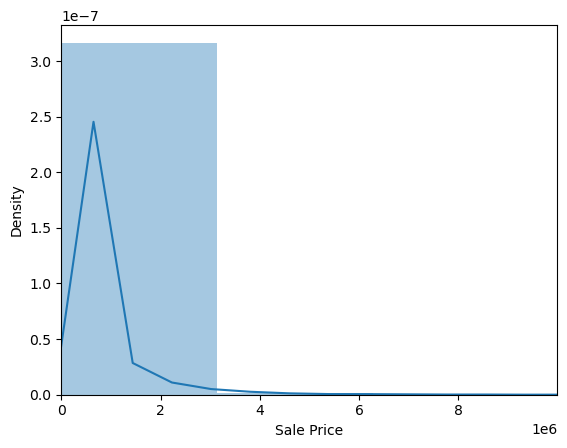

<AxesSubplot:xlabel='Estimated Value'>

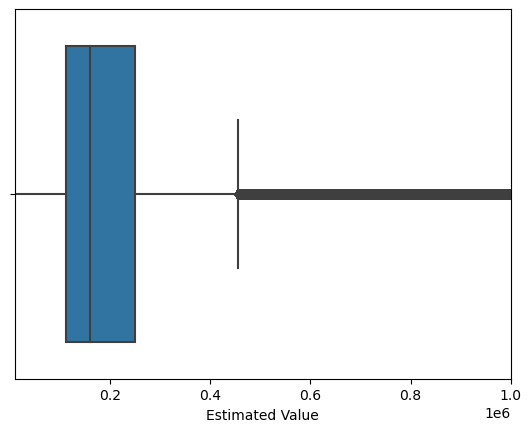

In [64]:
plt.xlim(10000,1000000)
sns.boxplot(data["Estimated Value"])

## As it is clearly visible there is an outlier lets check the validity of the outlier


In [65]:
data[data["Estimated Value"]>800000000]

,Year,Locality,Estimated Value,Property,Residential,num_rooms,carpet_area,property_tax_rate,Sale Price,Gain
430732,2020,Hamden,881510000.0,Condo,Condominium,2,777,1.02544,4680000.0,-8768300.0


## The estimated Value is nowhere around the SalePrice hence this can also distort the model

In [66]:
data.drop(data[data["Estimated Value"]>800000000].index,axis=0,inplace=True)

In [67]:
# Now checking Sale Price Outlier 

In [68]:
data[data["Sale Price"]>80000000]

,Year,Locality,Estimated Value,Property,Residential,num_rooms,carpet_area,property_tax_rate,Sale Price,Gain
240673,2016,Greenwich,15025570.0,Single Family,Detached House,3,1046,1.348259,120000000.0,1049744.3
526751,2022,Norwalk,507580.0,Four Family,Fourplex,8,2550,1.003979,157000000.0,1564924.2


In [69]:
# Considering the first observation both Estimated Value and Sale Price are acceptable
# In second Observation the estate is Fourplex with 8 number of rooms and 2550 carpet size so that is also acceptable 

## Converting categorical features  to numerical vars

In [70]:
num_cols=[]
cat_cols=[]
for i in data.columns:
    if data[i].dtype=="object" or data[i].dtype=="bool":
        cat_cols.append(i)
    elif data[i].dtype=="int64" or data[i].dtype=="float64":
        num_cols.append(i)

In [71]:
print(num_cols)
print(cat_cols)

['Year', 'Estimated Value', 'num_rooms', 'carpet_area', 'property_tax_rate', 'Sale Price', 'Gain']
['Locality', 'Property', 'Residential']


## Feature Selection

In [72]:
from scipy.stats import chi2_contingency

## The chi-square test of independence is a hypothesis test that examines whether two categorical variables are independent of each other or not. The null hypothesis is that the two variables are independent, while the alternative hypothesis is that they are dependent.

In [73]:
dep_cols_list = [[] for _ in range(len(cat_cols))]
dep_cols_dict = {col: 0 for col in cat_cols}

for i in range(len(cat_cols)):
    for j in range(i+1, len(cat_cols)):
        cont_table = pd.crosstab(data[cat_cols[i]], data[cat_cols[j]])
        stat, pval, dof, expected = chi2_contingency(cont_table)
        print("Chi-square test results for columns", cat_cols[i], "and", cat_cols[j])
        print("  p-value:", format(pval, '.12f'))
        if pval < 0.05:
            print("The categories in", cat_cols[i], "and", cat_cols[j], "are dependent on each other.")
            dep_cols_list[i].append(cat_cols[j])
            dep_cols_list[j].append(cat_cols[i])
            dep_cols_dict[cat_cols[i]] += 1
        else:
            print("The categories in", cat_cols[i], "and", cat_cols[j], "are not dependent on each other.")
            break

for i, dep_list in enumerate(dep_cols_list):
    print("\n")
    if dep_list:
        print(f"{cat_cols[i]} is dependent on:")
        for col in dep_list:
            print(f"- {col}")
        print()
    else:
        print(f"{cat_cols[i]} has no dependent columns.\n")


Chi-square test results for columns Locality and Property
  p-value: 0.000000000000
The categories in Locality and Property are dependent on each other.
Chi-square test results for columns Property and Residential
  p-value: 0.000000000000
The categories in Property and Residential are dependent on each other.


Locality is dependent on:
- Property



Property is dependent on:
- Locality
- Residential



Residential is dependent on:
- Property



#### As every categorical var  are dependent on each other we can try dropping them later

In [74]:
#for value in colname:
q1 = data['Sale Price'].quantile(0.25) #first quartile value
q3 = data['Sale Price'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range


### Pearson correlation matrix

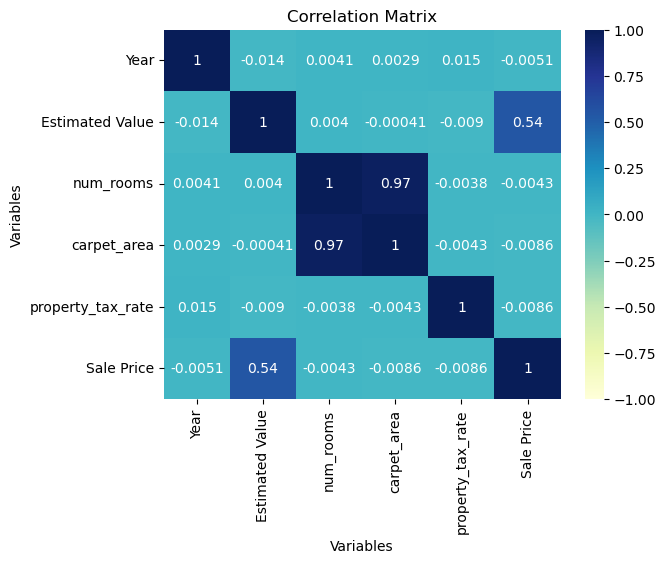

In [75]:
corr_matrix = data[num_cols[:-1]].corr()

# create a heatmap using seaborn
sns.heatmap(corr_matrix, cmap="YlGnBu",annot=True,vmax=1.0,vmin=-1.0)

# set the title and axis labels
plt.title("Correlation Matrix")
plt.xlabel("Variables")
plt.ylabel("Variables")

# show the plot
plt.show()

### Obviously if the num of rooms increases carpet area increases

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif_df = pd.DataFrame()
vif_df["features"] =num_cols[:-1]# first column
vif_df["VIF Factor"] = [vif(data[num_cols[:-1]].values, i) for i in range(data[num_cols[:-1]].shape[1])] 
#vif_df["VIF Factor"] = [vif(X.values, i) for i in range(len(X.columns))] 
vif_df.round(2)
 

,features,VIF Factor
0,Year,63.91
1,Estimated Value,1.75
2,num_rooms,258.40
3,carpet_area,257.62
4,property_tax_rate,46.92
5,Sale Price,1.80


#### According to Pearson correlation matrix and VIF we can conclude that we can drop num_rooms


In [77]:
# data.drop("num_rooms",axis=1,inplace=True)
# test.drop("num_rooms",axis=1,inplace=True)

In [78]:
num_cols=[]
for i in data.columns:
    if data[i].dtype=="int64" or data[i].dtype=="float64":
        num_cols.append(i)

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif_df = pd.DataFrame()
vif_df["features"] =num_cols[:-1]# first column
vif_df["VIF Factor"] = [vif(data[num_cols[:-1]].values, i) for i in range(data[num_cols[:-1]].shape[1])] 
#vif_df["VIF Factor"] = [vif(X.values, i) for i in range(len(X.columns))] 
vif_df.round(2)

,features,VIF Factor
0,Year,63.91
1,Estimated Value,1.75
2,num_rooms,258.40
3,carpet_area,257.62
4,property_tax_rate,46.92
5,Sale Price,1.80


In [80]:
data["Property"].unique()

array(['Condo', 'Single Family', 'Three Family', 'Two Family',
       'Four Family', 'Residential'], dtype=object)

In [81]:
data["Property"].replace({"Condo":0,"Single Family":1,"Two Family":2,"Three Family":3,"Four Family":4,"Residential":5},inplace=True)

In [82]:
test["Property"].replace({"Condo":0,"Single Family":1,"Two Family":2,"Three Family":3,"Four Family":4,"Residential":5},inplace=True)

In [83]:
data["Residential"].unique()

array(['Condominium', 'Detached House', 'Triplex', 'Duplex', 'Fourplex'],
      dtype=object)

In [84]:
data["Residential"].replace({"Condominium":0,"Duplex":1,"Triplex":2,"Fourplex":3,"Detached House":4},inplace=True)

In [85]:
test["Residential"].replace({"Condominium":0,"Duplex":1,"Triplex":2,"Fourplex":3,"Detached House":4},inplace=True)

In [86]:
data.head()

,Year,Locality,Estimated Value,Property,Residential,num_rooms,carpet_area,property_tax_rate,Sale Price,Gain
0,2009,Greenwich,711270.0,0,0,2,760,1.025953,975000.0,2637.3
1,2009,East Hampton,119970.0,1,4,3,921,1.025953,189900.0,699.3
2,2009,Ridgefield,494530.0,1,4,3,982,1.025953,825000.0,3304.7
3,2009,Old Lyme,197600.0,1,4,3,976,1.025953,450000.0,2524.0
4,2009,Naugatuck,105440.0,1,4,3,947,1.025953,200000.0,945.6


In [87]:
le=LabelEncoder()
data["Locality"]=le.fit_transform(data["Locality"])
data.head()

,Year,Locality,Estimated Value,Property,Residential,num_rooms,carpet_area,property_tax_rate,Sale Price,Gain
0,2009,57,711270.0,0,0,2,760,1.025953,975000.0,2637.3
1,2009,41,119970.0,1,4,3,921,1.025953,189900.0,699.3
2,2009,118,494530.0,1,4,3,982,1.025953,825000.0,3304.7
3,2009,105,197600.0,1,4,3,976,1.025953,450000.0,2524.0
4,2009,88,105440.0,1,4,3,947,1.025953,200000.0,945.6


In [88]:
test["Locality"]=le.transform(test["Locality"])

In [89]:
data["property_tax_rate"].unique()

array([1.025953 , 1.025846 , 1.025033 , 1.021958 , 1.020333 , 1.350819 ,
       1.340225 , 1.348259 , 1.388283 , 1.422308 , 1.0258995, 1.0254395,
       1.0234955, 1.003979 ])

In [90]:
# colname=["Sale Price","Estimated Value"]
# for i in colname:
#     data[i]=data[i].astype("int")

In [92]:
data.columns

Index(['Year', 'Locality', 'Estimated Value', 'Property', 'Residential',
       'num_rooms', 'carpet_area', 'property_tax_rate', 'Sale Price', 'Gain'],
      dtype='object')

In [93]:
data

,Year,Locality,Estimated Value,Property,Residential,num_rooms,carpet_area,property_tax_rate,Sale Price,Gain
0,2009,57,711270.0,0,0,2,760,1.025953,975000.0,2637.3
1,2009,41,119970.0,1,4,3,921,1.025953,189900.0,699.3
2,2009,118,494530.0,1,4,3,982,1.025953,825000.0,3304.7
3,2009,105,197600.0,1,4,3,976,1.025953,450000.0,2524.0
4,2009,88,105440.0,1,4,3,947,1.025953,200000.0,945.6
...,...,...,...,...,...,...,...,...,...,...
553947,2022,49,122420.0,5,4,3,1009,1.003979,198000.0,755.8
553948,2022,88,139180.0,5,4,3,999,1.003979,319900.0,1807.2
553949,2022,130,200000.0,5,4,3,1017,1.003979,305000.0,1050.0
553950,2022,11,195440.0,5,4,3,1061,1.003979,271000.0,755.6


In [94]:
data.drop("Gain",axis=1,inplace=True)

In [95]:
X=data.values[:,:-1]
Y=data.values[:,-1]

In [96]:
scaler=StandardScaler()

In [97]:
X=scaler.fit_transform(X)

In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=10,test_size=0.2)

In [99]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(441587, 8) (110397, 8) (441587,) (110397,)


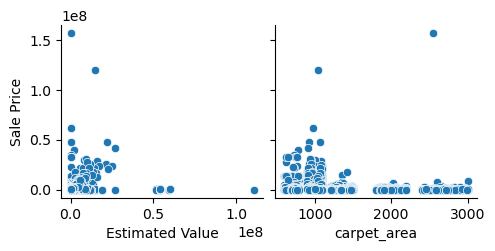

In [100]:
sns.pairplot(data,x_vars=["Estimated Value","carpet_area"],y_vars="Sale Price")

In [103]:
Dt=DecisionTreeRegressor(criterion="mse",random_state=10,splitter="best")
# fit the model 
Dt.fit(X_train,Y_train)
Y_pred=Dt.predict(X_test)
Dt

DecisionTreeRegressor(random_state=10)

In [104]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: -0.5032789969082574
RMSE: 770583.105254785
Adj R-square: -0.5033007845471456


In [105]:
Dt.score(X_train,Y_train)

0.9999898233042195

In [106]:
print(list(zip(data.columns[0:-1],Dt.feature_importances_*100)))

[('Year', 1.7734918562674469), ('Locality', 13.698962986855237), ('Estimated Value', 62.26637528776493), ('Property', 1.5497406304602257), ('Residential', 0.7596881302962869), ('num_rooms', 0.02733471234562886), ('carpet_area', 19.00958644773001), ('property_tax_rate', 0.9148199482802439)]


In [107]:
sample=pd.DataFrame()

sample["Column"]=data.columns[0:-1]
sample["Imp value"]=Dt.feature_importances_*100

sample.sort_values("Imp value",ascending=False)

,Column,Imp value
2,Estimated Value,62.266375
6,carpet_area,19.009586
1,Locality,13.698963
0,Year,1.773492
3,Property,1.549741
7,property_tax_rate,0.914820
4,Residential,0.759688
5,num_rooms,0.027335


In [649]:
# from sklearn import tree
# with open(r"saleprice.text","w")as f:
    
#     f=tree.export_graphviz(Dt,feature_names=data.columns[0:-1],out_file=f)
    
    

In [108]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
Dt=DecisionTreeRegressor(random_state=10)
knn=KNeighborsRegressor(n_neighbors=5,metric="euclidean")
# svm=SVR(gamma=0.1,C=10,kernel="rbf")

In [109]:
models=[Dt,knn]
for model in models:
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    r2=r2_score(Y_test, Y_pred)
    adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
    rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
    score=model.score(X_train,Y_train)
    print("The training of the ",type(model).__name__, " model is ",score*100 )
    print("The R squared error of the ",type(model).__name__, " model is ", r2*100 )
    print("The adjusted R squared error of the ",type(model).__name__, " model is ", adjusted_r_squared*100 )
    print("the RMSE of the ",type(model).__name__,"model is",rmse)
    print("/n")
    

The training of the  DecisionTreeRegressor  model is  99.99898233042195
The R squared error of the  DecisionTreeRegressor  model is  -50.32789969082574
The adjusted R squared error of the  DecisionTreeRegressor  model is  -50.33007845471455
the RMSE of the  DecisionTreeRegressor model is 770583.105254785
/n
The training of the  KNeighborsRegressor  model is  71.41127948298161
The R squared error of the  KNeighborsRegressor  model is  69.07216900972195
The adjusted R squared error of the  KNeighborsRegressor  model is  69.07172075998615
the RMSE of the  KNeighborsRegressor model is 349521.9220059935
/n


In [110]:
from sklearn.model_selection import GridSearchCV
parameter_space = {"min_samples_leaf":[9,13,15],
                    "min_samples_split":[3,5,7],
                   "max_depth":[30,40],
                  "max_features":[0.6,0.7,0.9,1],
                  "max_leaf_nodes":[400,500,600]}
    
    
clf = GridSearchCV(Dt,parameter_space,n_jobs=-1, cv=5)
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=10), n_jobs=-1,
             param_grid={'max_depth': [30, 40],
                         'max_features': [0.6, 0.7, 0.9, 1],
                         'max_leaf_nodes': [400, 500, 600],
                         'min_samples_leaf': [9, 13, 15],
                         'min_samples_split': [3, 5, 7]})

In [111]:
clf.best_params_

{'max_depth': 30,
 'max_features': 0.6,
 'max_leaf_nodes': 600,
 'min_samples_leaf': 15,
 'min_samples_split': 3}

In [112]:
clf.best_score_

0.6276361008813666

In [114]:
Dt=DecisionTreeRegressor(criterion="mse",random_state=10,splitter="best",**clf.best_params_
                        )
# fit the model 
Dt.fit(X_train,Y_train)
Y_pred=Dt.predict(X_test)

In [115]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.745973570705525
RMSE: 316766.4226378762
Adj R-square: 0.7459698889963273


In [116]:
Y_test.min()

1.0

In [117]:
Dt.score(X_train,Y_train)

0.6580120601064456

In [119]:
X_train.shape

(441587, 8)

### As we have more than 4 Lakh Observations KNN is not the best model to use hence tuning KNN wouldn't be the best way .

# Bagging And Boosting

In [122]:
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
Rf=RandomForestRegressor(n_estimators=50,random_state=10,bootstrap=True,n_jobs=-1) 
Et=ExtraTreesRegressor(random_state=10,n_estimators=50, bootstrap=True)
Adboost=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=10),n_estimators=50,random_state=10)
grad_boost=GradientBoostingRegressor(n_estimators=50,random_state=10)
Xg_boost=XGBRegressor(n_estimators=50,random_state=10)



In [123]:
models=[Rf,Et,Adboost,grad_boost,Xg_boost]
for model in models:
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    r2=r2_score(Y_test, Y_pred)
    adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
    rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
    score=model.score(X_train,Y_train)
    print("The training of the ",type(model).__name__, " model is ",score*100 )
    print("The R squared error of the ",type(model).__name__, " model is ", r2*100 )
    print("The adjusted R squared error of the ",type(model).__name__, " model is ", adjusted_r_squared*100 )
    print("the RMSE of the ",type(model).__name__,"model is",rmse)
    print("\n")
    

The training of the  RandomForestRegressor  model is  94.13746015003804
The R squared error of the  RandomForestRegressor  model is  55.793330918204774
The adjusted R squared error of the  RandomForestRegressor  model is  55.792690212823814
the RMSE of the  RandomForestRegressor model is 417872.3009170472


The training of the  ExtraTreesRegressor  model is  93.94351800366094
The R squared error of the  ExtraTreesRegressor  model is  76.4689914661306
The adjusted R squared error of the  ExtraTreesRegressor  model is  76.46865042157556
the RMSE of the  ExtraTreesRegressor model is 304873.69815061777


The training of the  AdaBoostRegressor  model is  99.99450365926262
The R squared error of the  AdaBoostRegressor  model is  74.21565788793058
The adjusted R squared error of the  AdaBoostRegressor  model is  74.21528418488805
the RMSE of the  AdaBoostRegressor model is 319137.4095901756


The training of the  GradientBoostingRegressor  model is  60.651478552632284
The R squared error of t

2023-06-19 12:52:04,453 - INFO     - Executing shutdown due to inactivity...
2023-06-19 12:52:24,493 - INFO     - Executing shutdown...


###  Best model here is  but as random forest , adaboost are giving the best accuracy we can also try to tune those models 

# XGB regressor

In [124]:
from sklearn.model_selection import GridSearchCV
parameter_space = {
    
                   "n_estimators":[100,50]}
    
clf = GridSearchCV(Xg_boost,parameter_space,n_jobs=-1, cv=5)
clf.fit(X_train,Y_train)
clf.best_params_

{'n_estimators': 50}

In [125]:
clf.best_score_


0.5540802785601086

In [127]:
Xg_boost=XGBRegressor(**clf.best_params_,random_state=10)
Xg_boost.fit(X_train,Y_train)
Y_pred=Xg_boost.predict(X_test)


In [128]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.49407600976642085
RMSE: 447035.8213893017
Adj R-square: 0.4940686772025875


# Random Forest

In [129]:
from sklearn.model_selection import GridSearchCV
parameter_space = {"min_samples_leaf":[3,5,9],
                    "min_samples_split":[3,7],
                   "max_depth":[15,20],
                  "max_features":[0.6,0.7],
                  "max_leaf_nodes":[250,300,400]}
    
    
clf = GridSearchCV(Rf,parameter_space,n_jobs=-1, cv=5)
clf.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=50, n_jobs=-1,
                                             random_state=10),
             n_jobs=-1,
             param_grid={'max_depth': [15, 20], 'max_features': [0.6, 0.7],
                         'max_leaf_nodes': [250, 300, 400],
                         'min_samples_leaf': [3, 5, 9],
                         'min_samples_split': [3, 7]})

In [131]:
clf.best_params_


{'max_depth': 15,
 'max_features': 0.6,
 'max_leaf_nodes': 400,
 'min_samples_leaf': 3,
 'min_samples_split': 7}

In [132]:
clf.best_score_

0.6633246086138275

In [161]:
Rf=RandomForestRegressor(n_estimators=80
                         ,max_depth=20,max_features=0.7,max_leaf_nodes=500,min_samples_leaf=5,min_samples_split=3,random_state=42)
Rf.fit(X_train,Y_train)
Y_pred=Rf.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7822288678978206
RMSE: 293291.7470944245
Adj R-square: 0.7822257116515109


In [162]:
Rf.score(X_train,Y_train)

0.7231243847106374

## Adaboost 

In [163]:
from sklearn.model_selection import GridSearchCV
parameter_space = {"n_estimators":[100,200]}
    
    
clf = GridSearchCV(Adboost,parameter_space,n_jobs=-1, cv=5)
clf.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=10),
                                         random_state=10),
             n_jobs=-1, param_grid={'n_estimators': [100, 200]})

In [164]:
clf.best_params_

{'n_estimators': 200}

In [165]:
clf.best_score_

0.4562394257440966

In [166]:
Adboost=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=10),**clf.best_params_,random_state=10)
Adboost.fit(X_train,Y_train)
Y_pred=Adboost.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7258188272297355
RMSE: 329092.89264842425
Adj R-square: 0.7258148534095766


In [167]:
Adboost.score(X_train,Y_train)

0.9993952406573051

In [168]:
from sklearn.model_selection import GridSearchCV
parameter_space = {"min_samples_leaf":[3,5,7,9],
                    "min_samples_split":[3,7,9],
                   "max_depth":[20,30],
                  "max_features":[0.6,0.8,0.9,1],
                  "max_leaf_nodes":[300,400]}
    
    
clf = GridSearchCV(grad_boost,parameter_space,n_jobs=-1, cv=5)
clf.fit(X_train,Y_train)


GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(n_estimators=50,
                                                 random_state=10),
             n_jobs=-1,
             param_grid={'max_depth': [20, 30],
                         'max_features': [0.6, 0.8, 0.9, 1],
                         'max_leaf_nodes': [300, 400],
                         'min_samples_leaf': [3, 5, 7, 9],
                         'min_samples_split': [3, 7, 9]})

In [169]:
from sklearn.model_selection import GridSearchCV
parameter_space = {"n_estimators":[200,300,500]}
    
    
clf1 = GridSearchCV(grad_boost,parameter_space,n_jobs=-1, cv=5)
clf1.fit(X_train,Y_train)


GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(n_estimators=50,
                                                 random_state=10),
             n_jobs=-1, param_grid={'n_estimators': [200, 300, 500]})

In [170]:
clf.best_params_

{'max_depth': 30,
 'max_features': 0.6,
 'max_leaf_nodes': 300,
 'min_samples_leaf': 9,
 'min_samples_split': 3}

In [171]:
clf1.best_params_

{'n_estimators': 200}

In [178]:
Gb=GradientBoostingRegressor(n_estimators=150,max_depth=20,max_features=0.6,min_samples_leaf=9,min_samples_split=3,max_leaf_nodes=300,random_state=10)
Gb.fit(X_train,Y_train)
Y_pred=Gb.predict(X_test)

In [179]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7636284196537707
RMSE: 305560.5742793424
Adj R-square: 0.7636249938235379


In [177]:
Gb.score(X_train,Y_train)

0.9088839628592995

In [686]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
# create the sub models
estimators = []
model1= DecisionTreeRegressor(criterion='squared_error',random_state=10)
estimators.append(('tree', model1))
model2 = XGBRegressor(n_estimators=1000,random_state=10)
estimators.append(('XGB', model2))
model3=GradientBoostingRegressor(n_estimators=1000,max_depth=20,max_features=0.8,min_samples_leaf=1,min_samples_split=7,random_state=10)
estimators.append(('knn', model3))
model4=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=10),n_estimators=200,random_state=10)
estimators.append(("Adaboost",model4))
model5=RandomForestRegressor(n_estimators=500,random_state=10,bootstrap=True,n_jobs=-1) 
estimators.append(("Random_Forest",model4))
print(estimators)
# create the ensemble model
ensemble = VotingRegressor(estimators)
ensemble.fit(X_train,Y_train)
Y_pred=ensemble.predict(X_test)
#print(Y_pred)

[('tree', DecisionTreeRegressor(random_state=10)), ('XGB', XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=10, ...)), ('knn', GradientBoostingRegressor(max_depth=20, max_features=0.8, min_samples_split=7,
                          n_estimators=1000, random_state=10)), ('Adaboost', AdaBoostRegressor(base_estimator=De

In [687]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.5903145092210839
RMSE: 402276.79362396325
Adj R-square: 0.5903085714812837


In [688]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.neighbors import KNeighborsRegressor
# create the sub modelswb
level0 = []
#model1 = LinearRegression()
#level0.append(('log', model1))
model2 = DecisionTreeRegressor(criterion='squared_error',random_state=10)
level0.append(('tree', model2))
#model3 = SVR(kernel="rbf", C=90,gamma=0.1)
#level0.append(('svm', model3))
model4 = KNeighborsRegressor(n_neighbors=53, metric='euclidean')
level0.append(('knn', model4))
print(estimators)
level1=LinearRegression()
# create the ensemble model
ensemble = StackingRegressor(estimators=level0, final_estimator=level1, cv=5,passthrough=False)
ensemble.fit(X_train,Y_train)
Y_pred=ensemble.predict(X_test)
#print(Y_pred)

[('tree', DecisionTreeRegressor(random_state=10)), ('XGB', XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=10, ...)), ('knn', GradientBoostingRegressor(max_depth=20, max_features=0.8, min_samples_split=7,
                          n_estimators=1000, random_state=10)), ('Adaboost', AdaBoostRegressor(base_estimator=De

In [689]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.6700130663582767
RMSE: 361033.9641869723
Adj R-square: 0.6700082837223438


## As this a Sale Price problem I should probably focus on RMSE Not much on the adjusted R squared still Random Forest is giving the best R squared as well as RMSE


# Hence Random Forest is the best model 

In [824]:
test.drop(["Date","Address"],axis=1,inplace=True)

In [825]:
test.head()

,Year,Locality,Estimated Value,Sale Price,Property,Residential,num_rooms,carpet_area,property_tax_rate,Segment
0,2023,105,151400.0,0,5,4,3,947.0,1.46,0
1,2023,118,686900.0,0,5,4,3,1051.0,1.46,0
2,2023,33,152030.0,0,5,4,3,925.0,1.46,0
3,2023,93,156130.0,0,5,1,4,1210.0,1.46,0
4,2023,6,108970.0,0,5,4,3,1089.0,1.46,0


In [826]:
test.columns

Index(['Year', 'Locality', 'Estimated Value', 'Sale Price', 'Property',
       'Residential', 'num_rooms', 'carpet_area', 'property_tax_rate',
       'Segment'],
      dtype='object')

In [827]:
test=test[['Year', 'Locality', 'Estimated Value', 'Property',
       'Residential', 'num_rooms', 'carpet_area', 'property_tax_rate', 'Sale Price',
       'Segment']]

In [828]:
final=scaler.transform(test.values[:,:-2])

In [829]:
final

array([[ 1.65907374,  0.32761102, -0.19057636, ...,  0.07321894,
        -0.17121135,  1.8832652 ],
       [ 1.65907374,  0.60141958,  0.8609666 , ...,  0.07321894,
         0.24970855,  1.8832652 ],
       [ 1.65907374, -1.18886715, -0.18933925, ...,  0.07321894,
        -0.2602521 ,  1.8832652 ],
       ...,
       [ 1.65907374,  0.81204154, -0.16701237, ...,  0.07321894,
        -0.13073829,  1.8832652 ],
       [ 1.65907374, -0.8308098 ,  0.06646747, ...,  0.07321894,
         0.37112775,  1.8832652 ],
       [ 1.65907374, -0.11469511, -0.23469993, ...,  0.07321894,
        -0.11050175,  1.8832652 ]])

In [830]:
test["Sale Price"]=Rf.predict(final)

In [831]:
test["Sale Price"]

0        214940.459833
1        984984.370814
2        215520.863365
3        214747.411008
4        165990.284492
             ...      
43949    192019.821653
43950    167219.786208
43951    234982.200500
43952    416248.105757
43953    185174.942692
Name: Sale Price, Length: 43954, dtype: float64

In [834]:
test["Gain"]=(test["Sale Price"]-test["Estimated Value"])/100

In [835]:
test.head()

,Year,Locality,Estimated Value,Property,Residential,num_rooms,carpet_area,property_tax_rate,Sale Price,Segment,Gain
0,2023,105,151400.0,5,4,3,947.0,1.46,214940.459833,0,635.404598
1,2023,118,686900.0,5,4,3,1051.0,1.46,984984.370814,0,2980.843708
2,2023,33,152030.0,5,4,3,925.0,1.46,215520.863365,0,634.908634
3,2023,93,156130.0,5,1,4,1210.0,1.46,214747.411008,0,586.174110
4,2023,6,108970.0,5,4,3,1089.0,1.46,165990.284492,0,570.202845


In [839]:
test.to_csv(r"C:\Users\shaik\Downloads\final_estate.csv")